In [1]:
# Loading common data related modules
import numpy as np
import pandas as pd
import math 

In [2]:
# Loading modelling algorithms
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors    import KNeighborsRegressor
from sklearn.ensemble     import AdaBoostRegressor
from sklearn.ensemble     import RandomForestRegressor

In [3]:
# Loading tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler
from sklearn.metrics         import r2_score

In [24]:
# Loading visualisation modules
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [7]:
# Configure visualisations 
%matplotlib inline

In [8]:
# Ignore warning messages
import warnings
warnings.filterwarnings('ignore')

In [9]:
diamonds = pd.read_csv('../ml_data/diamonds.csv')

In [10]:
# Review and clean the data (may be a repetitive task)
# remove unnecessary columns
diamonds.head()
diamonds.drop(['Unnamed: 0'] , axis=1 , inplace=True)
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [11]:
# review the data and get intuition about it
diamonds.shape
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


<AxesSubplot:>

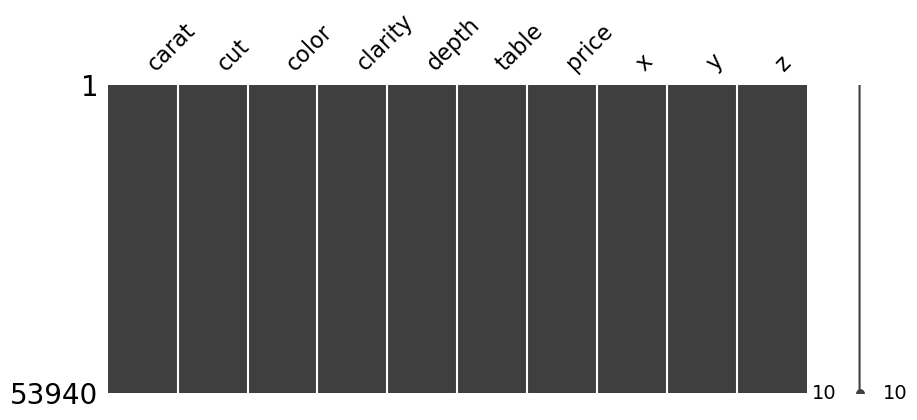

In [13]:
# find and eliminate nulls
diamonds.isnull().sum()
msno.matrix(diamonds, figsize=(10,4)) # just to visualize. no missing values.

In [15]:
# search for illogical values
diamonds.describe()
diamonds.loc[(diamonds['x']==0) | (diamonds['y']==0) | (diamonds['z']==0)]
len(diamonds[(diamonds['x']==0) | (diamonds['y']==0) | (diamonds['z']==0)])
diamonds = diamonds[(diamonds[['x','y','z']] != 0).all(axis=1)]

In [16]:
# always check after execution
diamonds.loc[(diamonds['x']==0) | (diamonds['y']==0) | (diamonds['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z


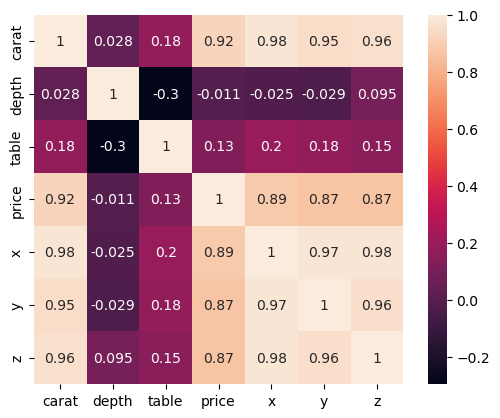

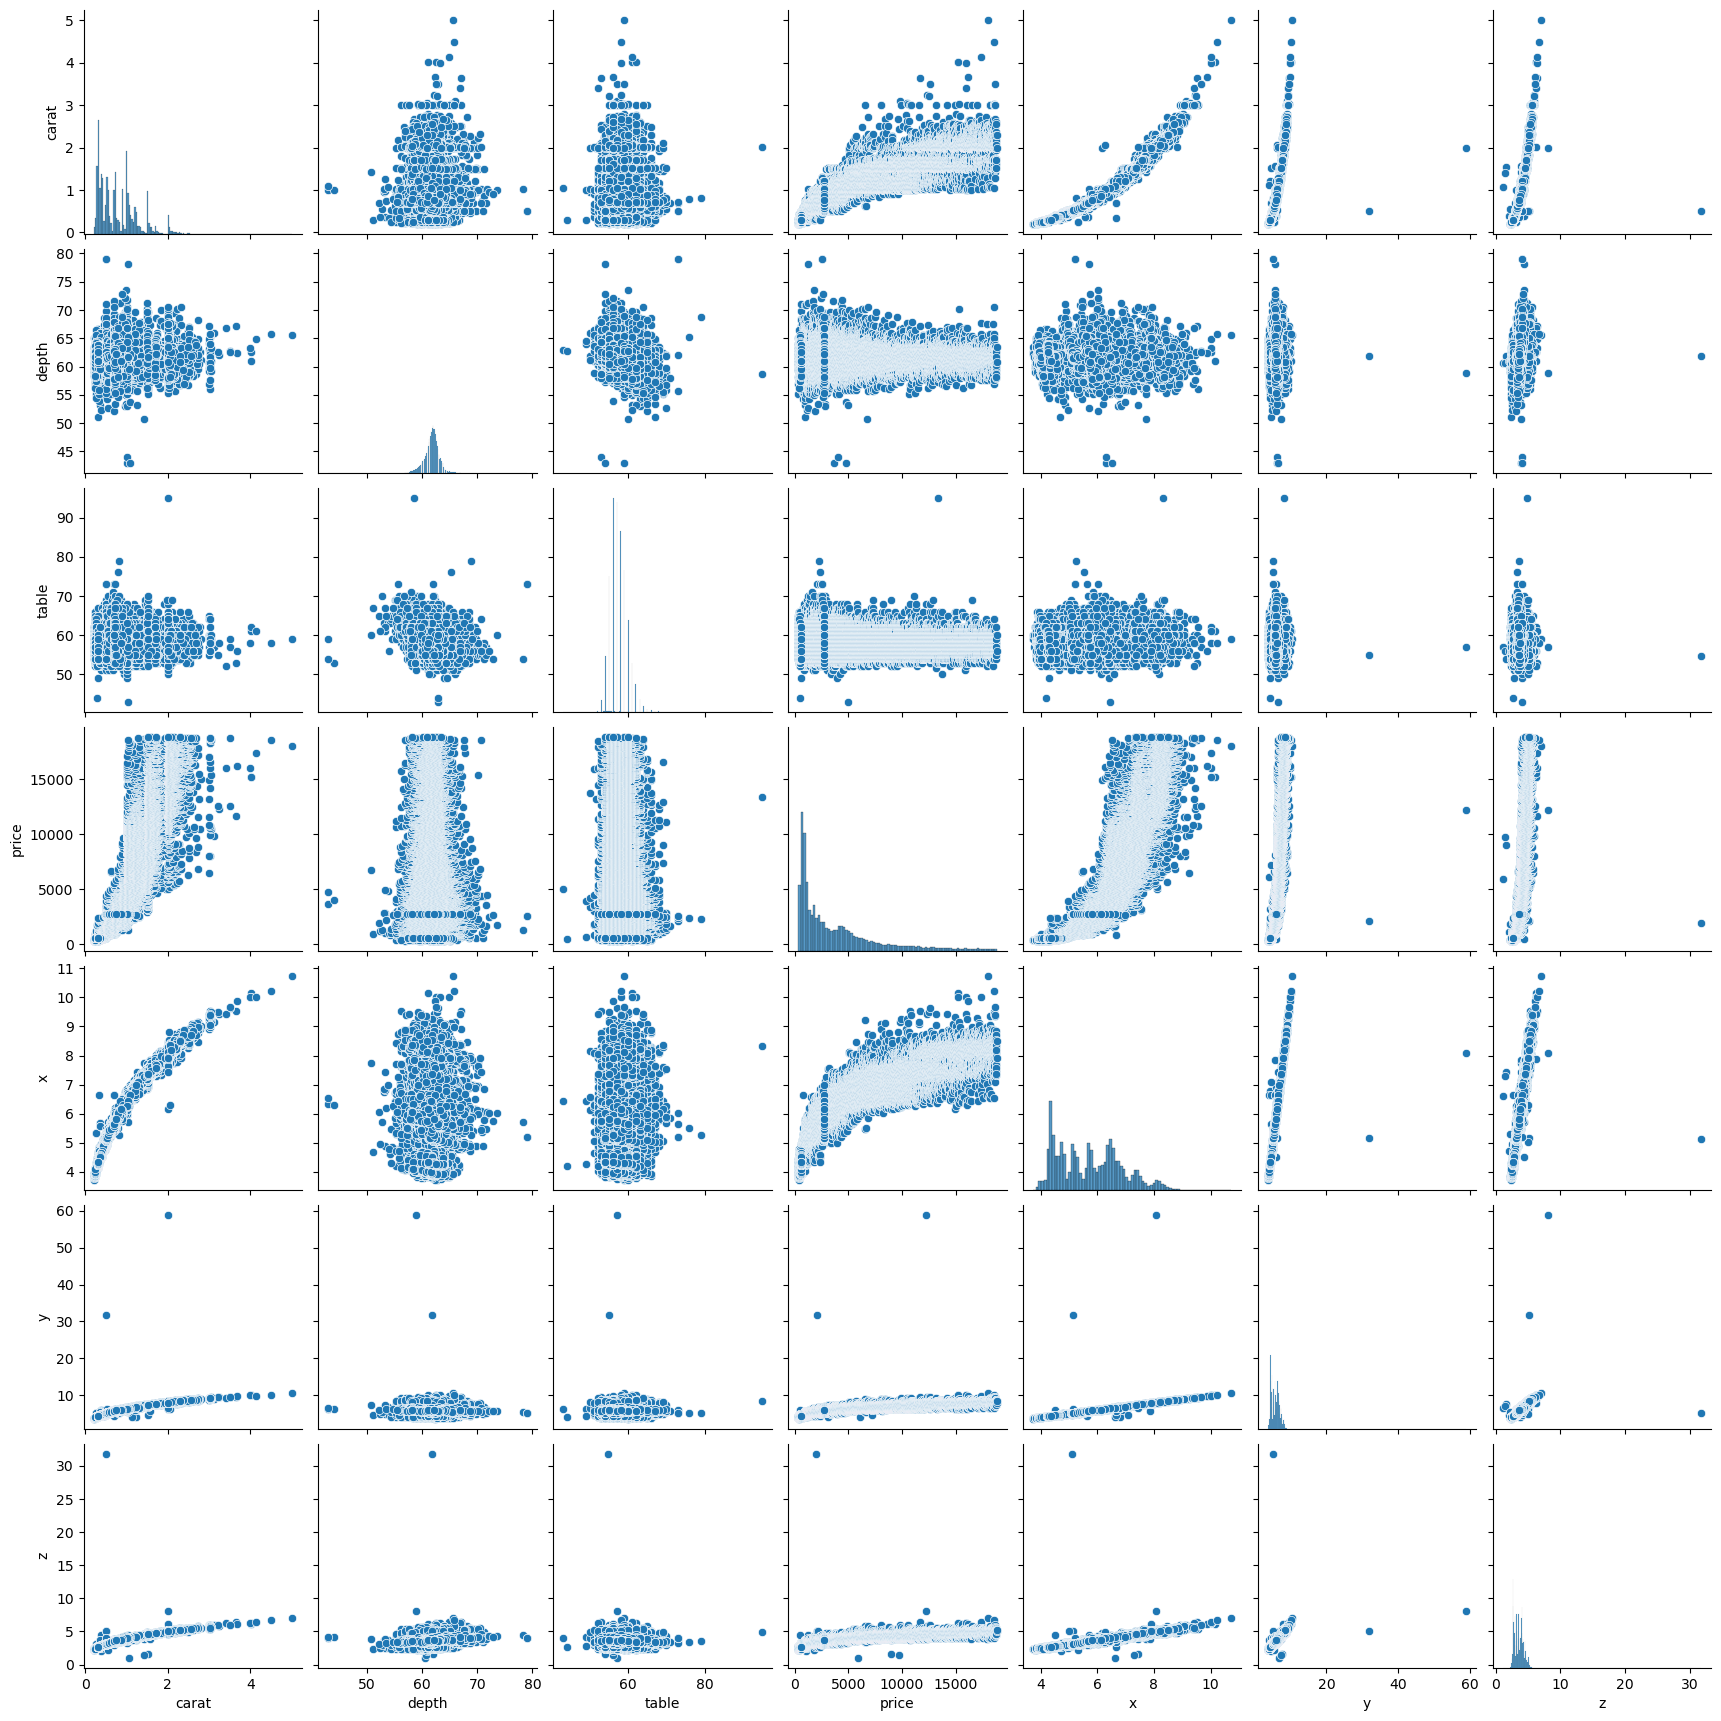

In [17]:
# Detect dependencies in the data
corr = diamonds.corr()
sns.heatmap(data=corr, square=True , annot=True, cbar=True)
sns.pairplot(diamonds)

(array([1.3092e+04, 1.0846e+04, 6.8450e+03, 3.9820e+03, 9.0050e+03,
        3.5410e+03, 2.7560e+03, 1.4020e+03, 2.8100e+02, 1.4940e+03,
        4.1000e+02, 1.4100e+02, 7.4000e+01, 1.1000e+01, 2.6000e+01,
        3.0000e+00, 1.0000e+00, 3.0000e+00, 1.0000e+00, 3.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([0.2   , 0.3924, 0.5848, 0.7772, 0.9696, 1.162 , 1.3544, 1.5468,
        1.7392, 1.9316, 2.124 , 2.3164, 2.5088, 2.7012, 2.8936, 3.086 ,
        3.2784, 3.4708, 3.6632, 3.8556, 4.048 , 4.2404, 4.4328, 4.6252,
        4.8176, 5.01  ]),
 <BarContainer object of 25 artists>)

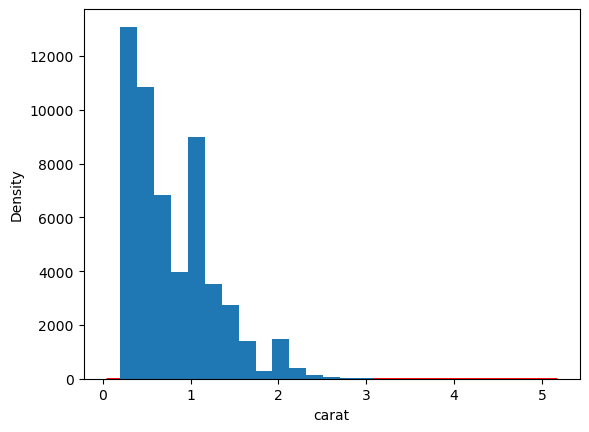

In [18]:
# check distribution
sns.kdeplot(diamonds['carat'], shade=True , color='r')
plt.hist(diamonds['carat'], bins=25)

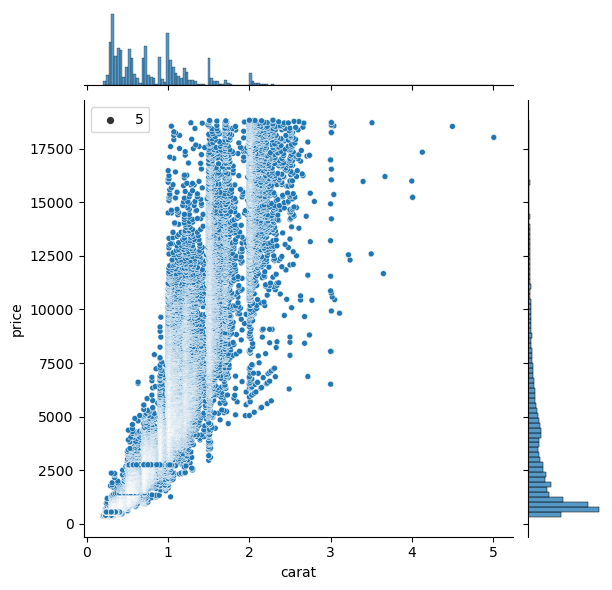

In [27]:
# check correlation graph
sns.jointplot(x='carat' , y='price' , data=diamonds , size=5)

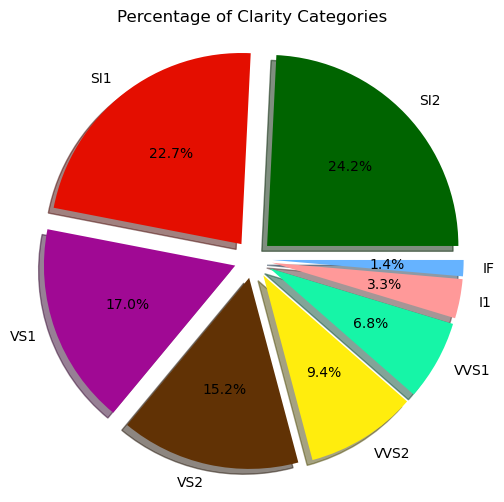

In [28]:
labels = diamonds.clarity.unique().tolist()
sizes = diamonds.clarity.value_counts().tolist()
colors = ['#006400', '#E40E00', '#A00994', '#613205', '#FFED0D', 
          '#16F5A7','#ff9999','#66b3ff']
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=0)
plt.axis('equal')
plt.title("Percentage of Clarity Categories")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

<AxesSubplot:xlabel='clarity', ylabel='price'>

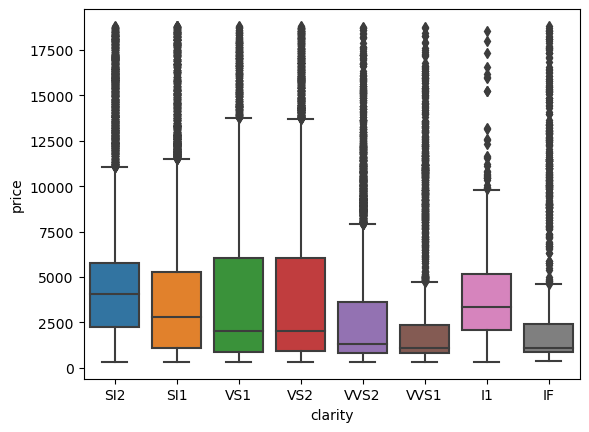

In [29]:
sns.boxplot(x='clarity', y='price', data=diamonds)

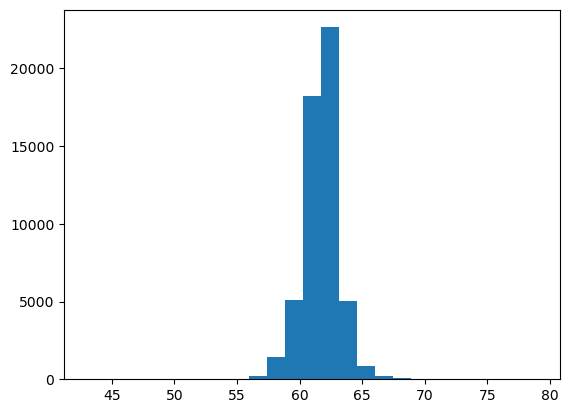

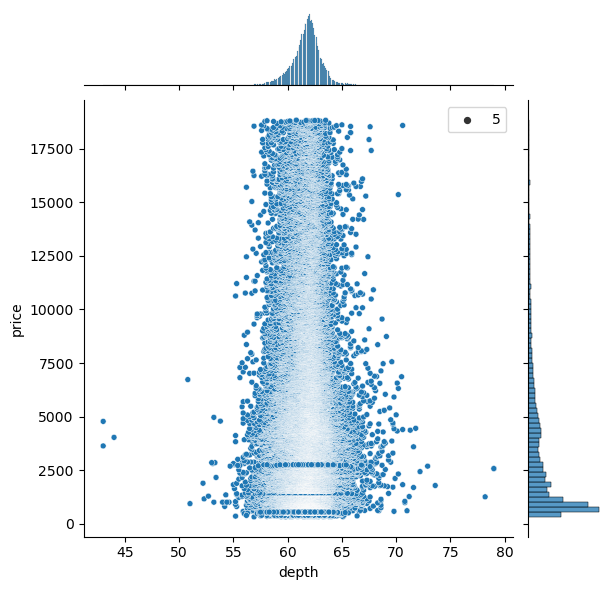

In [30]:
plt.hist('depth' , data=diamonds , bins=25)
sns.jointplot(x='depth', y='price', data=diamonds, size=5)

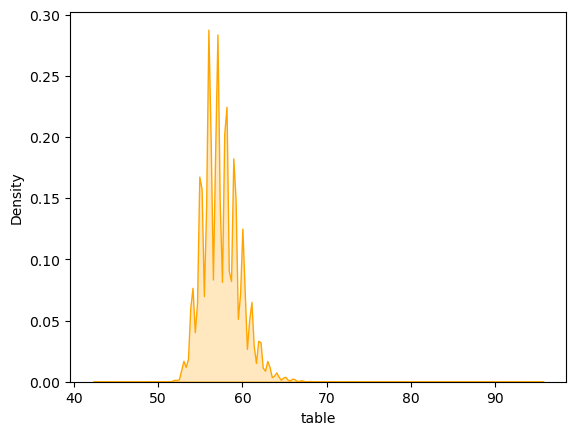

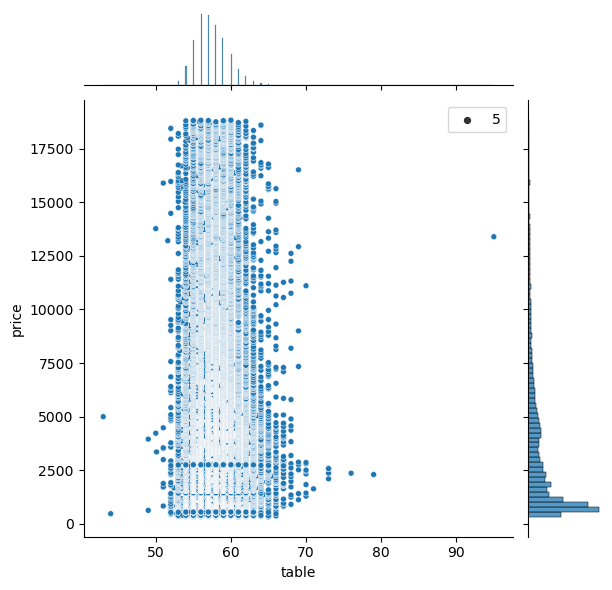

In [31]:
sns.kdeplot(diamonds['table'] ,shade=True , color='orange')
sns.jointplot(x='table', y='price', data=diamonds , size=5)

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


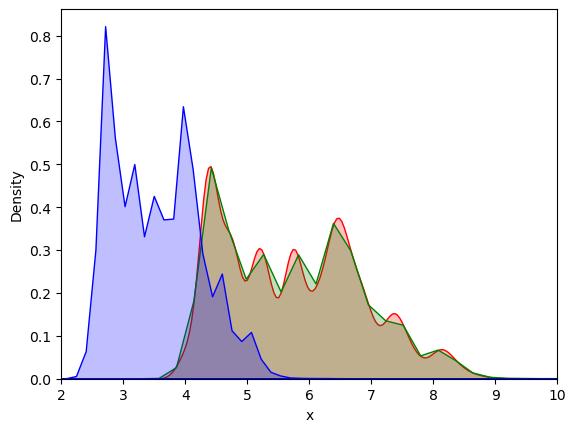

In [32]:
sns.kdeplot(diamonds['x'] ,shade=True , color='r' )
sns.kdeplot(diamonds['y'] , shade=True , color='g' )
sns.kdeplot(diamonds['z'] , shade= True , color='b')
plt.xlim(2,10)
diamonds['volume'] = diamonds['x']*diamonds['y']*diamonds['z']
diamonds.head()

(0.0, 50000.0)

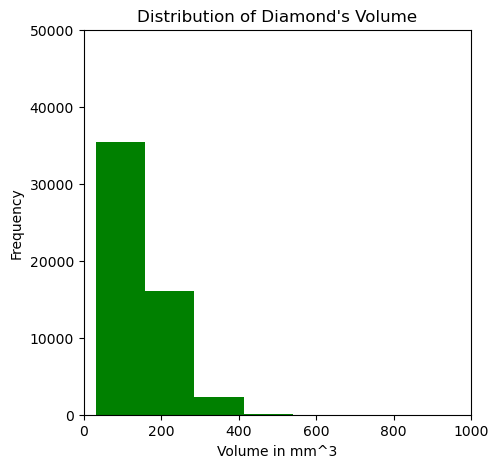

In [33]:
plt.figure(figsize=(5,5))
plt.hist( x=diamonds['volume'] , bins=30 ,color='g')
plt.xlabel('Volume in mm^3')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond\'s Volume')
plt.xlim(0,1000)
plt.ylim(0,50000)

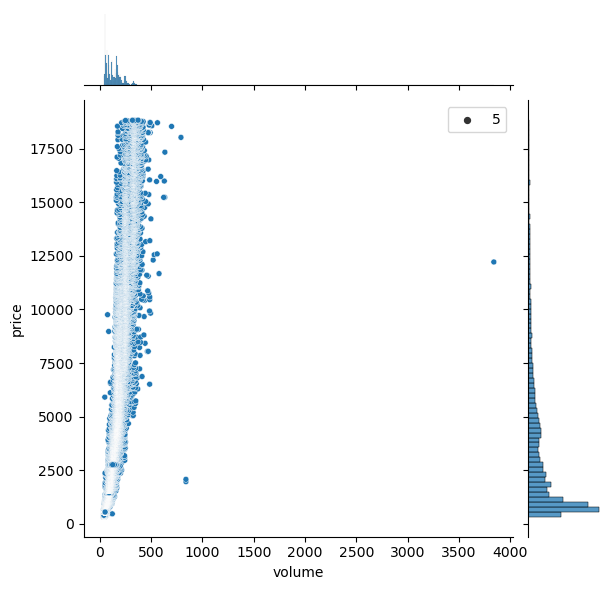

In [34]:
sns.jointplot(x='volume', y='price' , data=diamonds, size=5)

In [35]:
diamonds.drop(['x','y','z'], axis=1, inplace= True)
diamonds.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,51.917250


In [36]:
# One hot encoding
diamonds = pd.get_dummies(diamonds, prefix_sep='_', drop_first=True)
diamonds.head()


,carat,depth,table,price,volume,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,38.202030,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,34.505856,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,38.076885,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,46.724580,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,51.917250,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [37]:
# splitting data into features X, and labels y
X = diamonds.drop(['price'], axis=1)
y = diamonds['price']
#
# splitting data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, 
                                                    random_state=66)

In [38]:
# scaling values
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[ 0.44478313,  0.17288101, -0.20322089, ..., -0.54065658,
        -0.269607  , -0.3231673 ],
       [-0.54732375,  1.08170564,  1.13910995, ..., -0.54065658,
        -0.269607  ,  3.09437247],
       [-1.03282286, -0.52621485, -0.65066451, ..., -0.54065658,
        -0.269607  , -0.3231673 ],
       ...,
       [ 0.5081091 ,  0.59233853,  0.24422272, ..., -0.54065658,
        -0.269607  , -0.3231673 ],
       [ 0.46589178,  0.45251936, -1.09810812, ..., -0.54065658,
        -0.269607  , -0.3231673 ],
       [ 2.78784405,  0.2427906 , -0.65066451, ..., -0.54065658,
        -0.269607  , -0.3231673 ]])

In [39]:
# test different algorithms to get the data predictions 
scores = []
models = ['Linear Regression', 'Lasso Regression', 'AdaBoost Regression', 
          'Ridge Regression', 'RandomForest Regression', 
          'KNeighbours Regression']

In [42]:
lr = LinearRegression()
lr.fit(X_train , y_train)
y_pred = lr.predict(X_test)
r2 = r2_score(y_test, y_pred)
scores.append(r2)
print('Linear Regression R2: {0:.2f}'.format(r2))

Linear Regression R2: 0.92


In [44]:
 
# Lasso
lasso = Lasso(normalize=True)
lasso.fit(X_train , y_train)
y_pred = lasso.predict(X_test)
r2 = r2_score(y_test, y_pred)
scores.append(r2)
print('Lasso Regression R2: {0:.2f}'.format(r2))

Lasso Regression R2: 0.86


In [45]:
# Adaboost classifier
adaboost = AdaBoostRegressor(n_estimators=1000)
adaboost.fit(X_train , y_train)
y_pred = adaboost.predict(X_test)
r2 = r2_score(y_test, y_pred)
 
scores.append(r2)
print('AdaBoost Regression R2: {0:.2f}'.format(r2))

AdaBoost Regression R2: 0.86


In [46]:
# Ridge
ridge = Ridge(normalize=True)
ridge.fit(X_train , y_train)
y_pred = ridge.predict(X_test)
r2 = r2_score(y_test, y_pred)
 
scores.append(r2)
print('Ridge Regression R2: {0:.2f}'.format(r2))

Ridge Regression R2: 0.76


In [48]:
# Random forest
randomforest = RandomForestRegressor()
randomforest .fit(X_train , y_train)
y_pred = randomforest .predict(X_test)
r2 = r2_score(y_test, y_pred)
 
scores.append(r2)
print('Random Forest R2: {0:.2f}'.format(r2))

Random Forest R2: 0.98


In [49]:
# K-Neighbours
kneighbours = KNeighborsRegressor()
kneighbours.fit(X_train , y_train)
y_pred = kneighbours.predict(X_test)
r2 = r2_score(y_test, y_pred)
 
scores.append(r2)
print('K-Neighbours Regression R2: {0:.2f}'.format(r2))

K-Neighbours Regression R2: 0.95
